In [1]:
import pandas as pd
import numpy as np
import re
from pprint import pprint
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
from IPython.display import display

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100

pd.set_option("precision", 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
from typing import Tuple

def split_qa(qa: str) -> Tuple[str, str]:
    """
    Split columns name into question and answer.
    Example: "platform: Desktop" -> ("platform", "Desktop")
    """
    assert qa.count(":") == 1, f"Could not split string \"{qa}\", strange number of colons"
    question, answer = re.findall("(.*): (.*)", qa)[0]
    return question, answer

# Load data

## My survey

In [3]:
df = pd.read_csv("dataset.csv")
df = df.set_index(["origin", "participant_id"])

df_freeText = pd.read_csv("coded_free_text_answers.csv")
df_freeText = df_freeText.set_index(["origin", "participant_id"])

num_global_submissions = len(df.loc["global"])
num_automotive_submissions = len(df.loc["automotive"])
print(f"{num_global_submissions} global submissions")
print(f"{num_automotive_submissions} automotive submissions")

df

233 global submissions
102 automotive submissions


age Country of Birth Current Country of Residence  \
origin     participant_id                                                       
global     0              27.00   Czech Republic               Czech Republic   
           1              20.00           Poland                       Poland   
           2              42.00           Sweden                       Greece   
           3              18.00           Poland                       Poland   
           4              22.00   United Kingdom               United Kingdom   
...                         ...              ...                          ...   
automotive 330              NaN              NaN                          NaN   
           331              NaN              NaN                          NaN   
           332              NaN              NaN                          NaN   
           333              NaN              NaN                          NaN   
           334              NaN              NaN                          NaN   

                          Employment Status First Language     Nationality  \
origin     participant_id                                                    
global     0                      Full-Time          Czech  Czech Republic   
           1                      Part-Time         Polish          Poland   
           2                      Full-Time        Swedish          Sweden   
           3                      Part-Time         Polish          Poland   
           4                      Full-Time        English  United Kingdom   
...                                     ...            ...             ...   
automotive 330                          NaN            NaN             NaN   
           331                          NaN            NaN             NaN   
           332                          NaN            NaN             NaN   
           333                          NaN            NaN             NaN   
           334                          NaN            NaN             NaN   

                              Sex Student Status  \
origin     participant_id                          
global     0                 Male             No   
           1                 Male            Yes   
           2                 Male             No   
           3                 Male            Yes   
           4               Female             No   
...                           ...            ...   
automotive 330                NaN            NaN   
           331                NaN            NaN   
           332                NaN            NaN   
           333                NaN            NaN   
           334                NaN            NaN   

                          Knowledge of software development techniques   \
origin     participant_id                                                 
global     0                                                        NaN   
           1                                                        NaN   
           2                                                        NaN   
           3                                                        NaN   
           4                                                        NaN   
...                                                                 ...   
automotive 330                                                      NaN   
           331                                                      NaN   
           332                                                      NaN   
           333                                                      NaN   
           334                                                      NaN   

                          platform: Desktop  ...  \
origin     participant_id                    ...   
global     0                        Checked  ...   
           1                        Checked  ...   
           2                    Not checked  ...   
           3                    Not checked  .

## Eck 2019

In [4]:
# -- Eck

eck_teamSize = pd.Series({
    'Just me': 0.075,
    '2 - 5': 0.325,
    '6 - 10': 0.358,
    '11 - 20': 0.183,
    '21 - 100': 0.058,
    'More than 100 developers': 0,
    'Not answered': 0
})

eck_domain = pd.Series({
    "Engineering": 0.05
    # ...
})

eck_frequency = pd.Series({
    'Never': 0.092,
    'A few times a year': 0.317,
    'Monthly': 0.20,
    'Weekly': 0.242,
    'Daily': 0.142,
    'Multiple times per day': 0.008,
    'Not answered': 0
})

eck_severity = pd.Series({
    'Not a problem': 0.037,
    'A minor problem': 0.174,
    'A moderate problem': 0.560,
    'A serious problem': 0.229,
    'Not answered': 0
})

## Jetbrains State of Developer Ecosystem 2020

In [5]:
jetbrains_platform = pd.Series({
    "Desktop": 0.35,
    "Mobile": 0.32,
    "Web (Back-end)": 0.69,
    "Web (Front-end)": 0.57,
    "WebAssembly": 0.02,
    "Server / Infrastructure": 0.28,
    "IoT / Embedded": 0.09,
    "Classic AUTOSAR ECU": np.NaN,
    "Adaptive AUTOSAR ECU": np.NaN,
    "Consoles (Xbox / PlayStation / Nintendo etc.)": 0.01,
    "Not decided yet (research / proof of concept)": np.NaN,
    "I don't develop anything": 0.05,
    "Other": 0.01,
})
display(jetbrains_platform)

jetbrains_softwareType = pd.Series({
    "Automotive Chassis": np.NaN,
    "Automotive Drive Train": np.NaN,
    "Automated Driving, Driver Assistance": np.NaN,
    "Augmented Reality / Virtual Reality": 0.03,
    "Business Intelligence / Data Science / Machine Learning": 0.19,
    "Blockchain": 0.03,
    "Database / Data Storage": 0.30,
    "Education / Training": np.NaN,
    "Entertainment / Infotainment": 0.12,
    "Fintech (Finance)": 0.11,
    "Games": 0.10,
    "Hardware": 0.05,
    "Home Automation": 0.07,
    "IT Infrastructure": 0.17,
    "Libraries / Frameworks": 0.23,
    "Programming Tools": 0.16,
    "Security": 0.06,
    "System Software (e.g. OS driver)": 0.23,
    "Utilities (small apps for small tasks)": 0.36,
    "Websites": 0.54,
    "Other": 0.05,
})

Desktop                                         0.35
Mobile                                          0.32
Web (Back-end)                                  0.69
Web (Front-end)                                 0.57
WebAssembly                                     0.02
Server / Infrastructure                         0.28
IoT / Embedded                                  0.09
Classic AUTOSAR ECU                              NaN
Adaptive AUTOSAR ECU                             NaN
Consoles (Xbox / PlayStation / Nintendo etc.)   0.01
Not decided yet (research / proof of concept)    NaN
I don't develop anything                        0.05
Other                                           0.01
dtype: float64

# General demographics of global participants (Section IV.B)

In [6]:
df_to_plot = df.loc["global"].copy()

## Age

Youngest participant: 18.0
Oldest participant:   63.0
mean age:   29.5
median age: 28.0


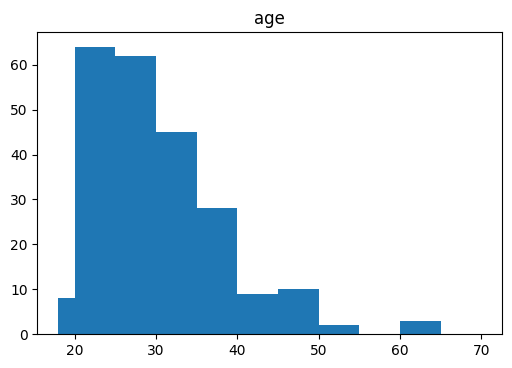

In [7]:
age_min = min(df_to_plot['age'])
age_max = max(df_to_plot['age'])
age_mean = df_to_plot['age'].mean()
age_median = df_to_plot['age'].median()

print(f"Youngest participant: {age_min}")
print(f"Oldest participant:   {age_max}")
print(f"mean age:   {age_mean:.1f}")
print(f"median age: {age_median}")

df_to_plot.hist(column="age", grid=False, bins=[18,20,25,30,35,40,45,50,55,60,65,70])
plt.show()

## Nationality

Portugal                            0.25
Poland                              0.11
United States                       0.10
Italy                               0.07
South Africa                        0.06
United Kingdom                      0.05
Spain                               0.05
Mexico                              0.03
Greece                              0.03
Canada                              0.03
Netherlands                         0.02
Hungary                             0.02
India                               0.02
Germany                             0.02
Estonia                             0.01
Israel                              0.01
Turkey                              0.01
Chile                               0.01
Czech Republic                      0.01
Nepal                               0.01
France                              0.01
Brazil                              0.01
Norway                              0.00
Costa Rica                          0.00
Sweden          

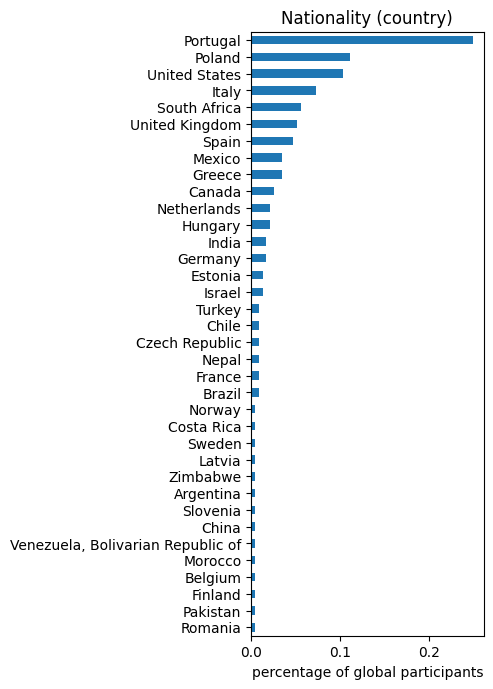

Europe          0.69
North America   0.17
Africa          0.06
Asia            0.06
South America   0.03
Name: Nationality_continent, dtype: float64

5 different countries of birth


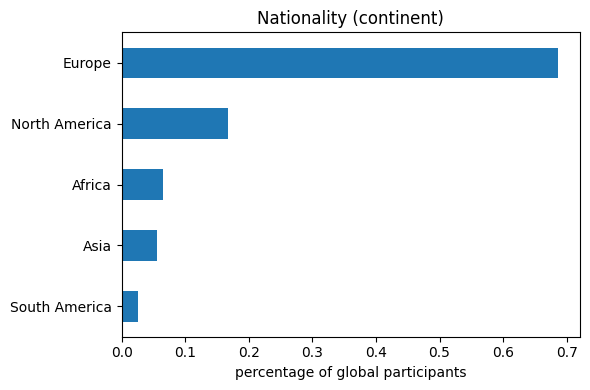

In [25]:
# -- add continent
from pycountry_convert import country_name_to_country_alpha2, country_alpha2_to_continent_code, convert_continent_code_to_continent_name
df_to_plot["Nationality_continent"] = df_to_plot["Nationality"]\
    .map(country_name_to_country_alpha2)\
    .map(country_alpha2_to_continent_code)\
    .map(convert_continent_code_to_continent_name)


# COUNTRY

df_country_plot = df_to_plot["Nationality"].value_counts(normalize=True, ascending=True)
display(df_country_plot[::-1])
df_country_plot.plot.barh(figsize=(3,8), title="Nationality (country)")
plt.xlabel("percentage of global participants")
plt.show()

percent_Portugal = df_country_plot["Portugal"]

# CONTINENT

df_continent_plot = df_to_plot["Nationality_continent"].value_counts(normalize=True, ascending=True)
display(df_continent_plot[::-1])
print(f"{len(df_continent_plot)} different countries of birth")
df_continent_plot.plot.barh(title="Nationality (continent)")
plt.xlabel("percentage of global participants")
plt.tight_layout()
plt.show()

## Sex

Male     0.81
Female   0.19
Name: Sex, dtype: float64

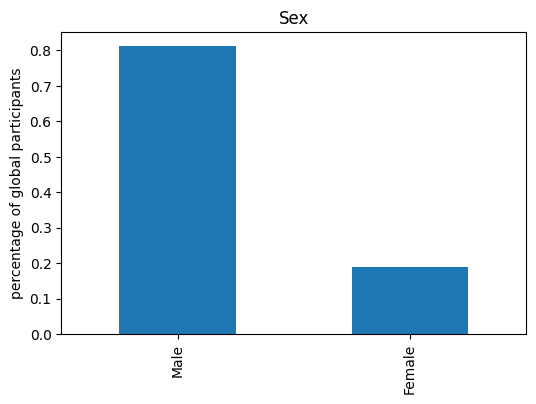

In [9]:
df_this_plot = df_to_plot["Sex"].value_counts(normalize=True)
display(df_this_plot)
df_this_plot.plot.bar(title="Sex")
plt.ylabel("percentage of global participants")
plt.show()

## Student Status

No             0.64
Yes            0.35
DATA EXPIRED   0.01
Name: Student Status, dtype: float64

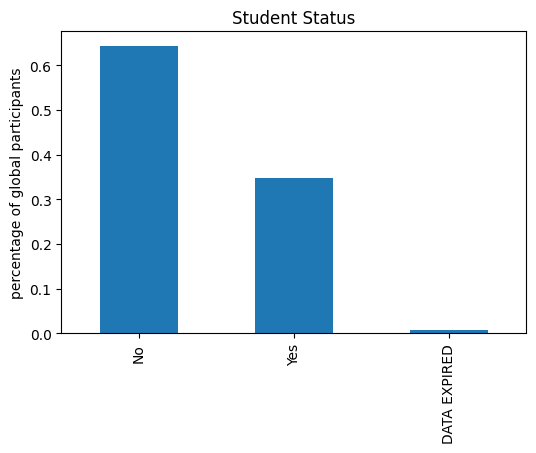

In [10]:
df_this_plot = df_to_plot['Student Status'].value_counts(normalize=True)
display(df_this_plot)
df_this_plot.plot.bar(title="Student Status")
plt.ylabel("percentage of global participants")
plt.show()

## Employment status

Full-Time   0.80
Part-Time   0.20
Name: Employment Status, dtype: float64

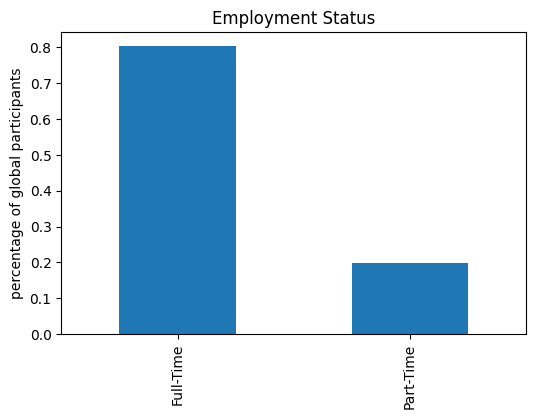

In [11]:
df_this_plot = df_to_plot['Employment Status'].value_counts(normalize=True)
display(df_this_plot)
df_this_plot.plot.bar(title="Employment Status")
plt.ylabel("percentage of global participants")
plt.show()

# Demographic questions (Table II)

In [12]:
from questionaire_structure import *

for question in demographic_questions:
    
    if question in ["codeSize", "teamSize"]:
        # Single-choice questions
        df_this_plot = pd.DataFrame(index=qmap[question]["values"])
        df_this_plot["global"] = df.loc["global"][question].value_counts(normalize=True)
        df_this_plot["automotive"] = df.loc["automotive"][question].value_counts(normalize=True)
        df_this_plot["both"] = df[question].value_counts(normalize=True)
        df_this_plot
    else:
        # Multiple-choice questions
        df_this_plot = df[qmap[question]["columns"]]\
            .replace(multiple_choice_values_to_int)\
            .groupby("origin")\
            .sum()\
            .rename(lambda x: split_qa(x)[1], axis="columns")\
            .T
        df_this_plot["both"] = df_this_plot["automotive"] + df_this_plot["global"]

        # Calculate relative values
        df_this_plot["global"] = df_this_plot["global"] / num_global_submissions
        df_this_plot["automotive"] = df_this_plot["automotive"] / num_automotive_submissions
        df_this_plot["both"] = df_this_plot["both"] / (num_global_submissions + num_automotive_submissions)

        # Reorder columns
        df_this_plot = df_this_plot[["global", "automotive", "both"]]
        
    # Fill unanswered options with 0
    df_this_plot = df_this_plot.fillna(0)

    # Set index name to question name
    df_this_plot.columns.name = None
    df_this_plot.index.name = question

    # Apply color map
    display(df_this_plot.style.background_gradient(cmap="Greys", axis=None))

,global,automotive,both
platform,,,
Desktop,0.55,0.40,0.50
Mobile,0.37,0.15,0.30
Web (Back-end),0.47,0.22,0.39
Web (Front-end),0.53,0.15,0.41
WebAssembly,0.03,0.02,0.02
Server / Infrastructure,0.19,0.26,0.21
IoT / Embedded,0.10,0.46,0.21
Classic AUTOSAR ECU,0.01,0.19,0.06
Adaptive AUTOSAR ECU,0.00,0.31,0.10


,global,automotive,both
softwareType,,,
Automotive Chassis,0.01,0.07,0.03
Automotive Drive Train,0.00,0.02,0.01
"Automated Driving, Driver Assistance",0.01,0.37,0.12
Augmented Reality / Virtual Reality,0.03,0.06,0.04
Business Intelligence / Data Science / Machine Learning,0.17,0.13,0.16
Blockchain,0.04,0.00,0.03
Database / Data Storage,0.34,0.11,0.27
Education / Training,0.15,0.02,0.11
Entertainment / Infotainment,0.12,0.24,0.16


,global,automotive,both
codeSize,,,
less than 1k LOC,0.12,0.01,0.09
1k - 10k LOC,0.32,0.08,0.25
10k - 100k LOC,0.33,0.25,0.30
100k - 1M LOC,0.15,0.32,0.21
1M - 10M LOC,0.05,0.17,0.08
more than 10M LOC,0.03,0.15,0.07
Not answered,0.00,0.02,0.01


,global,automotive,both
teamSize,,,
Just me,0.23,0.05,0.18
2 - 5,0.45,0.23,0.38
6 - 10,0.15,0.07,0.13
11 - 20,0.08,0.16,0.10
21 - 100,0.07,0.13,0.09
More than 100 developers,0.02,0.36,0.13
Not answered,0.00,0.01,0.00


,global,automotive,both
testLevel,,,
Unit Tests,0.61,0.94,0.71
Component Tests,0.27,0.58,0.37
Integration Tests,0.52,0.83,0.61
System Tests,0.39,0.51,0.43
Software in the loop Tests (i),0.15,0.26,0.18
Platform in the loop Tests,0.08,0.11,0.09
Hardware in the loop Tests,0.05,0.19,0.09
Other,0.05,0.03,0.04


,global,automotive,both
testingPractices,,,
Manual testing,0.85,0.64,0.79
Automated testing,0.61,0.88,0.70
Continuous Integration,0.33,0.96,0.53
Regression Testing,0.25,0.60,0.36
Fuzzing,0.04,0.12,0.07
Property based testing,0.06,0.02,0.04
Parameterized tests,0.13,0.51,0.24
Test generation,0.07,0.13,0.09
Other,0.00,0.02,0.01


# Prevalence and Severity (Fig. 1, 2)

,Never,A few times a year,Monthly,Weekly,Daily,Multiple times per day,Not answered
automotive,0.03,0.27,0.12,0.31,0.10,0.17,NaN
global,0.04,0.26,0.21,0.34,0.10,0.04,NaN
both,0.04,0.26,0.19,0.33,0.10,0.08,NaN
Eck et al.,0.09,0.32,0.20,0.24,0.14,0.01,0.00


,Not a problem,A minor problem,A moderate problem,A serious problem,Not answered
automotive,0.09,0.15,0.31,0.45,NaN
global,0.06,0.33,0.50,0.11,NaN
both,0.07,0.28,0.44,0.21,NaN
Eck et al.,0.04,0.17,0.56,0.23,0.00


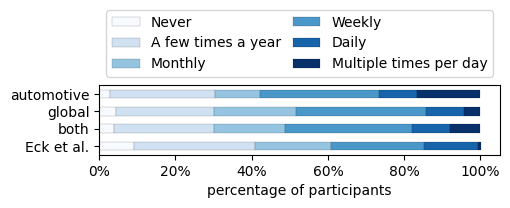

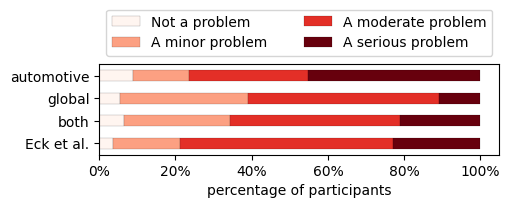

In [13]:
# Frequency = Prevalence

for question in ["frequency", "severity"]:
    values = qmap[question]["values"]
    df_this_plot = pd.DataFrame(index=values)
    df_this_plot["automotive"] = df.loc["automotive"][question].value_counts(normalize=True)
    df_this_plot["global"] = df.loc["global"][question].value_counts(normalize=True)
    df_this_plot["both"] = df[question].value_counts(normalize=True)
    if question == "frequency":
        df_this_plot["Eck et al."] = eck_frequency
    if question == "severity":
        df_this_plot["Eck et al."] = eck_severity
    df_this_plot = df_this_plot.T
    display(df_this_plot)
    
    df_this_plot = df_this_plot.drop(columns="Not answered")
    
    # PLOT
    ax = df_this_plot.plot.barh(
        stacked=True,
        colormap="Blues" if question == "frequency" else "Reds",
        edgecolor="black",
        linewidth=0.1,
        figsize=(5.2, 2.2)
    )
    # reverse y-axis
    plt.gca().invert_yaxis()
    # format y-axis as percentage
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0, 0))
    # format legend
    plt.legend(
        bbox_to_anchor=(0., 1.02, 1., .102),
        loc=3,
        ncol=2,
        mode="expand",
    )
    # add axis labels
    plt.xlabel("percentage of participants")
    plt.ylabel("")
    # tight layout
    plt.tight_layout()

# Logistic Regression (Fig. 3)

In [14]:
def replace_all_values_with_int(
    df: pd.DataFrame,
    platform_softwareType_testLevel_testingPractices=True,
    codeSize=True, teamSize=True, frequency=True, severity=True,
    consequence_rootCaues_mitigations=True, 
):
    # -- Copy (necessary, because I'm setting column values and this is always inplace)
    r = df.copy()
    
    pstt_cols = platform_columns + softwareType_columns + testLevel_columns + testingPractices_columns
    rcm_cols = rootCause_columns + consequences_columns + mitigations_columns

    if platform_softwareType_testLevel_testingPractices and set(pstt_cols).issubset(r.columns):
        r[pstt_cols] = r[pstt_cols].replace(multiple_choice_values_to_int)
    if codeSize and "codeSize" in r.columns:
        r["codeSize"] = r["codeSize"].replace(codeSize_values_to_int)
    if teamSize and "teamSize" in r.columns:
        r["teamSize"] = r["teamSize"].replace(teamSize_values_to_int)
    if frequency and "frequency" in r.columns:
        r["frequency"] = r["frequency"].replace(frequency_values_to_int)
    if severity and "severity" in r.columns:
        r["severity"] = r["severity"].replace(severity_values_to_int)
    if consequence_rootCaues_mitigations and set(rcm_cols).issubset(r.columns):
        r[rcm_cols] =\
        r[rcm_cols].replace(likert_values_to_int)
        
    return r

In [15]:
# -- Statsmodels
import scipy.stats as stats
from statsmodels.miscmodels.ordinal_model import OrderedModel

def ordinal_logit(df, X_cols, y_col):
    
    r = df.copy()
    print(f"{len(r)} total entries")
    
    # -- Replace values with int
    r = replace_all_values_with_int(r, frequency=False, severity=False)
    # -- Make categorical
    if y_col == "frequency":
        r["frequency"] = pd.Categorical(r["frequency"], frequency_value_without_not_answered, ordered=True)
    if y_col == "severity":
        r["severity"] = pd.Categorical(r["severity"], severity_value_without_not_answered, ordered=True)
        
    # -- ALTERNATIVE: replace all values with int
#     r = replace_all_values_with_int(df) 
    
    # -- Dropna (based on specific columns)
    r = r[X_cols + [y_col]].dropna()
    print(f"{len(r)} fully complete entries (regarding demographic columns)")

    X = r[X_cols]
    y = r[y_col]
    
    mod_log = OrderedModel(y, X, distr='logit')

    res_log = mod_log.fit(method='bfgs', disp=False)
    
    # -- 99% Confidence interval
    ci99 = res_log.conf_int(0.01)
    
    summary = res_log.summary()
    summary_df = pd.DataFrame({
        "coef": res_log.params,
        "pvals": res_log.pvalues,
        "conf_lower": res_log.conf_int()[0],
        "conf_higher": res_log.conf_int()[1],
        "conf_low_99": ci99[0],
        "conf_high_99": ci99[1],
    })
    summary_df["p_under_0.05"] = summary_df["pvals"] < 0.05
    summary_df["conf_not_crossing_0"] = summary_df.apply(lambda s: np.sign(s["conf_lower"]) == np.sign(s["conf_higher"]), axis=1)
    summary_df["conf_99_not_crossing_0"] = summary_df.apply(lambda s: np.sign(s["conf_low_99"]) == np.sign(s["conf_high_99"]), axis=1)
    summary_df["oddsRatio"] =  summary_df["coef"].apply(np.exp)

    if (summary_df["p_under_0.05"] == summary_df["conf_not_crossing_0"]).all():
#         print("(p-value under 0.05) and (confidence intervals not crossing 0) suggest the same significances")
        pass
    else:
        print("WARNING: p-value under 0.05 and confidence intervals suggest DIFFERENT significances")

    return summary_df, summary_df[summary_df["p_under_0.05"]][["coef", "oddsRatio", "pvals", "conf_lower", "conf_higher"]], res_log
    # return summary_df, summary_df[summary_df["conf_99_not_crossing_0"]][["coef", "oddsRatio", "pvals", "conf_lower", "conf_higher"]], res_log

In [16]:
def plot_oddsRatios(freq_logit, severity_logit, filename):
    idx = freq_logit.index.union(severity_logit.index).drop([
        # -- frequency
        "Never/A few times a year",
        "A few times a year/Monthly",
        "Weekly/Daily",
        # -- severity
        "Not a problem/A minor problem",
        "A minor problem/A moderate problem",
        "A moderate problem/A serious problem",
        # -- Other
        "testLevel: Other",
    ], errors="ignore")
    df_this_plot = pd.DataFrame(index=idx)
    df_this_plot["prevalence"] = freq_logit_significant["oddsRatio"]
    df_this_plot["severity"] = severity_logit_significant["oddsRatio"]

    df_this_plot = df_this_plot.rename(
        index=lambda i: i\
        .replace("platform", "PL")\
        .replace("softwareType", "ST")\
        .replace("testLevel", "TL")\
        .replace("testingPractices", "TP")\
        .replace("(Xbox / PlayStation / Nintendo etc.)", "")\
    )

    # -- Plot
    import matplotlib
    blues = matplotlib.cm.get_cmap('Blues')
    reds = matplotlib.cm.get_cmap('Reds')
    df_this_plot.plot.barh(color=[blues(0.8), reds(0.4)], figsize=(6,4))

    plt.gca().invert_yaxis()
    plt.vlines(1, ymin=-100, ymax=100, color="black")
    plt.xlabel("Odds Ratio")
    plt.tight_layout()

    if filename is not None:
        my_plt_savefig(filename)

In [17]:
demographic_cols_without_size = [x for x in demographic_question_columns if x not in ["codeSize", "teamSize"]]

freq_logit, freq_logit_significant, freq_model = ordinal_logit(df, demographic_cols_without_size, "frequency")
severity_logit, severity_logit_significant, severity_model = ordinal_logit(df, demographic_cols_without_size, "severity")

335 total entries
335 fully complete entries (regarding demographic columns)
335 total entries
335 fully complete entries (regarding demographic columns)


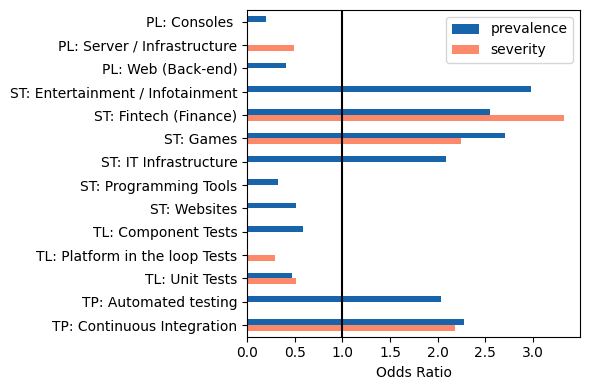

In [18]:
plot_oddsRatios(freq_logit_significant, severity_logit_significant, filename=None)

# Means per platform (Table III)

In [19]:
# Which platforms have more than ten participants?
platform_counts = df[platform_columns].replace(multiple_choice_values_to_int).sum()
display(platform_counts)

print()
print("MORE THAN 10 PARTICIPANTS:")
display(platform_counts[platform_counts > 10])

platform: Desktop                                          169
platform: Mobile                                           101
platform: Web (Back-end)                                   131
platform: Web (Front-end)                                  138
platform: WebAssembly                                        8
platform: Server / Infrastructure                           72
platform: IoT / Embedded                                    70
platform: Classic AUTOSAR ECU                               21
platform: Adaptive AUTOSAR ECU                              33
platform: Consoles (Xbox / PlayStation / Nintendo etc.)      9
platform: Not decided yet (research / proof of concept)     10
platform: I don't develop anything                           5
platform: Other                                             14
dtype: int64


MORE THAN 10 PARTICIPANTS:


platform: Desktop                    169
platform: Mobile                     101
platform: Web (Back-end)             131
platform: Web (Front-end)            138
platform: Server / Infrastructure     72
platform: IoT / Embedded              70
platform: Classic AUTOSAR ECU         21
platform: Adaptive AUTOSAR ECU        33
platform: Other                       14
dtype: int64

In [20]:
target_cols = ["frequency", "severity", "codeSize", "teamSize"]
r = df[target_cols + platform_columns].copy()

r["frequency"] = r["frequency"].replace(frequency_values_to_int)
r["severity"] = r["severity"].replace(severity_values_to_int)
r["codeSize"] = r["codeSize"].replace(codeSize_values_to_int)
r["teamSize"] = r["teamSize"].replace(teamSize_values_to_int)
r[platform_columns] = r[platform_columns].replace(multiple_choice_values_to_int)
# r = r.rename(columns=lambda x: split_qa(x)[1] if x in platform_columns else x)

print("MEANS:")
print(r[target_cols].mean())
print()

df_this_plot = pd.DataFrame(index=target_cols)
for platform in platform_counts[platform_counts > 10].index:
    df_this_plot[platform] = r[r[platform] == 1][target_cols].mean()
    
df_this_plot = df_this_plot\
    .drop(columns="platform: Other")\
    .rename(columns=lambda x: split_qa(x)[1])\
    .T\
    .sort_values("frequency")

df_this_plot.index.name = "platform"
    
df_this_plot.style.background_gradient(cmap="Greys")

MEANS:
frequency   2.43
severity    1.80
codeSize    2.15
teamSize    1.92
dtype: float64



,frequency,severity,codeSize,teamSize
platform,,,,
Web (Back-end),2.13,1.66,2.07,1.55
Web (Front-end),2.19,1.67,2.05,1.53
Classic AUTOSAR ECU,2.33,2.19,3.29,3.95
Server / Infrastructure,2.47,1.72,2.17,2.10
Desktop,2.48,1.74,2.03,1.72
Mobile,2.50,1.70,1.85,1.61
IoT / Embedded,2.67,2.10,2.74,2.81
Adaptive AUTOSAR ECU,2.88,2.48,3.62,4.39


# Root Causes, Consequences, Mitigations (Table IV, V, VI)

In [21]:
for question in ["rootCause", "consequences", "mitigations"]:
    
    helper_df = df[qmap[question]["columns"]]\
        .rename(columns=lambda x: qmap[question]["a_to_aShort"][split_qa(x)[1]])\
        .replace(likert_values_to_int)

    df_this_plot = pd.DataFrame(index=helper_df.columns)
    df_this_plot["global"] = helper_df.loc["global"].mean()
    df_this_plot["auto"] = helper_df.loc["automotive"].mean()
    df_this_plot["both"] = helper_df.mean()
    
    # sort by "both" column
    df_this_plot.sort_values("both", inplace=True, ascending=False)
    
    # Set index name to question name
    df_this_plot.columns.name = None
    df_this_plot.index.name = question
    
    # Table IV has only one column
    if question == "rootCause":
        display(df_this_plot[["both"]].style.background_gradient(cmap="Greys", axis=None))

    # apply color map
    display(df_this_plot.style.background_gradient(cmap="Greys", axis=None))
        


,both
rootCause,
Concurrency,1.80
Order-dependency (victim),1.74
Async Wait,1.70
Unknown Cause,1.63
Network (remote),1.60
Test case timeout,1.56
Test suite timeout,1.51
Order-dependency (brittle),1.48
Infrastructure,1.40


,global,auto,both
rootCause,,,
Concurrency,1.73,1.99,1.80
Order-dependency (victim),1.73,1.79,1.74
Async Wait,1.73,1.62,1.70
Unknown Cause,1.63,1.64,1.63
Network (remote),1.55,1.72,1.60
Test case timeout,1.57,1.52,1.56
Test suite timeout,1.55,1.42,1.51
Order-dependency (brittle),1.64,1.11,1.48
Infrastructure,1.32,1.59,1.40


,global,auto,both
consequences,,,
Wasting developer time,2.32,2.73,2.44
Rerun failures without analyzing,1.89,2.54,2.08
Merging PRs is harder,1.73,2.89,2.08
Wasting computational resources,1.65,2.54,1.91
Rerun passes suspecting hidden bugs,2.00,1.54,1.86
Delayed releases,1.73,1.86,1.77


,global,auto,both
mitigations,,,
Rerun,2.70,3.05,2.80
Rerun in different environment,2.10,1.37,1.89
Auto report,1.66,1.12,1.51
Flag,1.53,1.45,1.51
Shuffle test order,1.59,1.00,1.43
Incentives & Penalties,1.39,1.40,1.40
Disable,1.18,1.59,1.29
Quantify,1.34,1.09,1.27
Visualize,1.34,1.04,1.26


# Wishes (Table VII)

In [22]:
all_codes = [c for c in df_freeText.columns if c not in ["question", "answer"]]
all_wishes = [c for c in all_codes if c.startswith("Code\\Wishes")]
wishes_top_level_star_codes = [
    c for c in all_wishes
    if "\\*" in c
    and c != "Code\Wishes\Where?\*"
    and c.count("\\") == 3
]

display(df_freeText[["Code\\Wishes\\*"]].sum())
top_wishes = df_freeText[wishes_top_level_star_codes].sum().sort_values(ascending=False)
top_wishes

Code\Wishes\*    183
dtype: int64

Code\Wishes\Visualization\*            32
Code\Wishes\Detection\*                31
Code\Wishes\not usable\*               30
Code\Wishes\Auto Debug\*               28
Code\Wishes\Education\*                25
Code\Wishes\Rerun\*                    17
Code\Wishes\Debug (manually)\*         16
Code\Wishes\stable infrastructure\*    16
Code\Wishes\Logging\*                  13
Code\Wishes\Management\*               11
Code\Wishes\Reproducibility\*           9
dtype: int64

In [23]:
for wish in top_wishes.index:
    sub_wishes = [x for x in all_wishes if wish.replace("\\*", "") in x]
    display(df_freeText[sub_wishes].sum().sort_values(ascending=False))
    print()

Code\Wishes\Visualization\*                                    32
Code\Wishes\Visualization\test result history visualization    14
Code\Wishes\Visualization\Visualization (general wish)          6
Code\Wishes\Visualization\Visual Tracking                       4
Code\Wishes\Visualization\of flaky code                         3
Code\Wishes\Visualization                                       2
Code\Wishes\Visualization\Actual vs. Expected                   2
Code\Wishes\Visualization\Visual Diffing                        2
Code\Wishes\Visualization\Visualize Environment                 2
dtype: int64

Code\Wishes\Detection\*                           31
Code\Wishes\Detection\Linter\*                    12
Code\Wishes\Detection\Linter                       8
Code\Wishes\Detection\Detection (general wish)     7
Code\Wishes\Detection                              5
Code\Wishes\Detection\Linter\Linter in IDE         4
Code\Wishes\Detection\early Detection              3
Code\Wishes\Detection\Provoke / Expose             2
Code\Wishes\Detection\via Rerun                    2
Code\Wishes\Detection\Detect via ML                1
Code\Wishes\Detection\based on outcome             1
Code\Wishes\Detection\detect dependencies          1
dtype: int64

Code\Wishes\not usable\*                           30
Code\Wishes\not usable\not interpretable           14
Code\Wishes\not usable\Don't know                   7
Code\Wishes\not usable\Nothing                      5
Code\Wishes\not usable\Anything                     3
Code\Wishes\not usable\depends on the situation     1
dtype: int64

Code\Wishes\Auto Debug\*                     28
Code\Wishes\Auto Debug                       12
Code\Wishes\Auto Debug\find root cause        6
Code\Wishes\Auto Debug\find location          5
Code\Wishes\Auto Debug\find failure cause     4
Code\Wishes\Auto Debug\failure replay         1
dtype: int64

Code\Wishes\Education\*                                                  25
Code\Wishes\Education\Information\*                                      16
Code\Wishes\Education\Information\Best practices to avoid flaky tests     5
Code\Wishes\Education                                                     4
Code\Wishes\Education\Information\Guide                                   4
Code\Wishes\Education\Help from (senior) colleagues                       3
Code\Wishes\Education\Information                                         3
Code\Wishes\Education\Information\Examples                                3
Code\Wishes\Education\Education / Training                                2
Code\Wishes\Education\Feedback                                            1
Code\Wishes\Education\Information\Forums                                  1
dtype: int64

Code\Wishes\Rerun\*                               17
Code\Wishes\Rerun\Rerun (general wish)             5
Code\Wishes\Rerun\change execution order           4
Code\Wishes\Rerun\Rerun in different env.          3
Code\Wishes\Rerun                                  2
Code\Wishes\Rerun\rerun via gradle plugin          2
Code\Wishes\Rerun\under specific circumstances     1
dtype: int64

Code\Wishes\Debug (manually)\*                      16
Code\Wishes\Debug (manually)                        10
Code\Wishes\Debug (manually)\debug real time         2
Code\Wishes\Debug (manually)\stack trace             2
Code\Wishes\Debug (manually)\heap snapshots          1
Code\Wishes\Debug (manually)\show https requests     1
Code\Wishes\Debug (manually)\stack dumps             1
dtype: int64

Code\Wishes\stable infrastructure\*                                         16
Code\Wishes\stable infrastructure                                           10
Code\Wishes\stable infrastructure\Machine readable infrastructure status     5
Code\Wishes\stable infrastructure\Android                                    1
dtype: int64

Code\Wishes\Logging\*                         13
Code\Wishes\Logging\Logging (general wish)     3
Code\Wishes\Logging\about Environment          3
Code\Wishes\Logging\Diffing                    1
Code\Wishes\Logging\Dumps                      1
Code\Wishes\Logging\Point out timeouts         1
Code\Wishes\Logging\Tracing                    1
Code\Wishes\Logging\about variables            1
Code\Wishes\Logging\back trace                 1
Code\Wishes\Logging\core dump                  1
dtype: int64

Code\Wishes\Management\*                         11
Code\Wishes\Management\Good Team                  4
Code\Wishes\Management\Priority + Resources       4
Code\Wishes\Management\Incentives & Penalties     2
Code\Wishes\Management\Reporting                  2
Code\Wishes\Management\No broken window           1
Code\Wishes\Management\Proper Planning            1
Code\Wishes\Management\learn from mistakes        1
dtype: int64

Code\Wishes\Reproducibility\*                                   9
Code\Wishes\Reproducibility\Reproducibility (general wish)      3
Code\Wishes\Reproducibility\failure replay\*                    3
Code\Wishes\Reproducibility\failure replay                      2
Code\Wishes\Reproducibility\isolate test                        2
Code\Wishes\Reproducibility\failure replay\record user steps    1
Code\Wishes\Reproducibility\same order execution                1
dtype: int64